<a href="https://colab.research.google.com/github/dil150898/Airbnb-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap


In [3]:
file_path = ('/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Airbnb/Dil khush Sharma/Airbnb NYC 2019.csv')
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#here we can observe that the top Ten busiest host

In [7]:
most_not_available_host = df[df['availability_365']==0].groupby(['host_id','host_name','neighbourhood_group','neighbourhood','price']).size().sort_values(ascending=False).reset_index(name='most_busy').head(10)
most_not_available_host

,host_id,host_name,neighbourhood_group,neighbourhood,price,most_busy
0,100238132,Michael,Manhattan,Midtown,339,9
1,732460,Nôm,Brooklyn,Williamsburg,120,6
2,193502084,Linda,Brooklyn,Borough Park,40,5
3,232578558,Nick & D.,Brooklyn,East Flatbush,48,4
4,22959695,Gurpreet Singh,Queens,Richmond Hill,50,4
5,180212824,Samet,Manhattan,Upper East Side,99,3
6,24831061,Hosteeva,Manhattan,Midtown,310,3
7,89388277,Maria,Manhattan,Lower East Side,118,3
8,51913826,The Bowery House,Manhattan,Nolita,84,3
9,236659049,Yesenia,Brooklyn,Bushwick,40,3


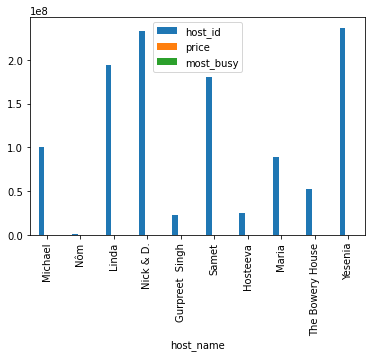

In [8]:
most_not_available_host.plot.bar(x='host_name')

In [9]:
most_not_available_room_type = df[df['availability_365']==0].groupby(['room_type']).size().sort_values(ascending=False).reset_index(name='not_available').head()
most_not_available_room_type

,room_type,not_available
0,Entire home/apt,8876
1,Private room,8361
2,Shared room,296


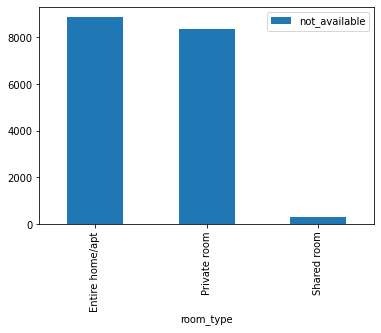

In [10]:
most_not_available_room_type.plot.bar(x='room_type')

In [11]:
most_not_available_neighbourhood = df[df['availability_365']==0].groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='not_available').head(10)
most_not_available_neighbourhood

,neighbourhood,not_available
0,Williamsburg,1868
1,Bedford-Stuyvesant,1232
2,Bushwick,1016
3,Harlem,924
4,East Village,896
5,Upper West Side,882
6,Upper East Side,703
7,Crown Heights,652
8,Greenpoint,530
9,Hell's Kitchen,512


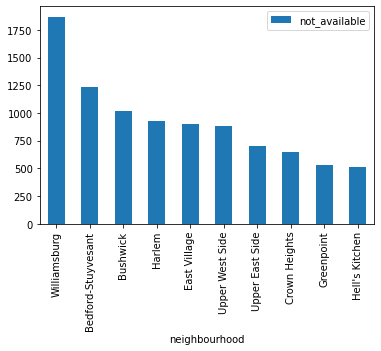

In [12]:
most_not_available_neighbourhood.plot.bar(x='neighbourhood')

In [13]:
most_not_available_neighbourhood_group = df[df['availability_365']==0].groupby(['neighbourhood_group']).size().sort_values(ascending=False).reset_index(name='not_available').head()
most_not_available_neighbourhood_group

,neighbourhood_group,not_available
0,Manhattan,8102
1,Brooklyn,7844
2,Queens,1368
3,Bronx,177
4,Staten Island,42


In [14]:
df[df['neighbourhood_group']=='Manhattan'].groupby(['neighbourhood']).size().sort_values(ascending=False).reset_index(name='not_available').head(10)

,neighbourhood,not_available
0,Harlem,2658
1,Upper West Side,1971
2,Hell's Kitchen,1958
3,East Village,1853
4,Upper East Side,1798
5,Midtown,1545
6,East Harlem,1117
7,Chelsea,1113
8,Lower East Side,911
9,Washington Heights,899


In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [17]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#Lets check out the columns having null values

In [18]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#We can notice the followings
* Number_of reviews and reviews_per_month is possitively corelated which is  obvious
*There is possitive correlation between host_id and id which is a spurious correlation (which means although its correlated but practicly its doesnt make any sense )

In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [21]:
percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'The percentage of data having availability as 0 is {percentage_of_data_having_availbility_0} %')

The percentage of data having availability as 0 is 35.86 %


#So we can notice that the availability column is having minimum value as well as the 25th percentile is 0, so this seems awkward because having availability days as 0 for 36% of data is a bit shocking if you have a business providing stays on Airbnb and the availibility is 0 days that is an extreme case and extreme cases are shocking when it comes 36% of data is having an extreme case.

#But it is not practically possible to exactly detect which apartments are having really availability 0 days, so we will not alter this column if we try to alter it we can end up manipulating apartments that are really busy (i.e 0 no. of days availability).

#.
#.
#.
#We can also clearly see that minimum price is 0 , which is surprising as price 0 doesnt make sense to do business

#Lets check out the last_review wise count of where availability_365 is 0

In [22]:
df[df['availability_365']==0].groupby(['last_review']).size().sort_values(ascending=False).head(15)

last_review
2019-01-01    194
2018-01-01    142
2019-01-02    129
2019-06-23     90
2018-01-02     86
2017-01-01     85
2019-05-27     75
2017-01-02     73
2016-01-02     67
2019-07-01     63
2016-01-03     61
2018-12-30     61
2019-01-03     60
2019-06-24     59
2018-12-31     57
dtype: int64

#Lets fill this data with appropriate price values (by filling the price with median price for each room_type)

In [23]:
df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Private room') & (df.price==0),'price']=df.loc[ (df.room_type=='Private room') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Shared room') & (df.price==0),'price']=df.loc[ (df.room_type=='Shared room') & (df.price!=0),'price'].median()

In [24]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.739094,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.146276,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**NOTE: We can notice that we have succesfully updated the price column where we have values as 0 , we succesfully updated the value with respective price value**

In [25]:
df.fillna({'reviews_per_month':0},inplace=True)

#Question 1) Which hosts are having highest number of appartments ?

**Question 1) Which hosts are having highest number of appartments ?**

In [26]:
df['host_name'].value_counts().head(10)

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [27]:
df["host_id"].value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

**From this, we can see that the host_name Michael it's appearing 417 times in the host_name column, so this might imply that Michael is having the highest number of rooms, but from the host_id column, it shows the highest appearance of any host_id is 327, so this implies that there can be multiple people that may have the same name that's why we are getting different highest appearance in host_name as compared to host_id.**

**Lets check which host_name is actually having heighest number of appartments.**

In [28]:
df[df['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

**So Sonder (NYC) is having maximum numbers of rooms for the guest, for Airbnb he might be very important person then.**

In [29]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446


**So Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**

#.

#.

#.

#Question 2) Which are the top 10 neighbourhood which are having maximum number of appartments on airbnb ?#

In [30]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

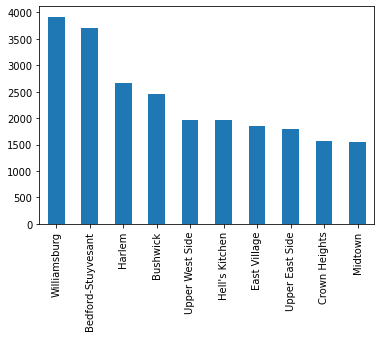

In [31]:
# Plotting top 10 neighbourhood which are having maximum number of appartments on Airbnb

pd.value_counts(df['neighbourhood'])[:10].plot.bar()

In [32]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

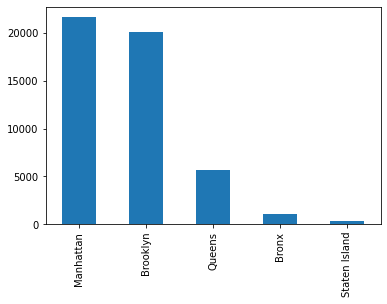

In [33]:
# Plotting number of apartments in each neighbourgroup on Airbnb
pd.value_counts(df['neighbourhood_group']).plot.bar()

#Question 3) Which neighbourhood in each group are having maximum amongst their respective neighbourhood group?

In [34]:
# Dataframe of each neighbourhood group
df_manhattan=df[df['neighbourhood_group']=='Manhattan']
df_queens=df[df['neighbourhood_group']=='Queens']
df_brooklyn=df[df['neighbourhood_group']=='Brooklyn']
df_bronx=df[df['neighbourhood_group']=='Bronx']
df_staten=df[df['neighbourhood_group']=='Staten Island']

# Top 3 neighbourhood in Manhattan which are having maximum prices 
print('Top 3 Neighbourhoods in Manhattan which are having maximum prices ')
df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 Neighbourhoods in Manhattan which are having maximum prices 


,neighbourhood,price
0,Upper West Side,10000
1,East Harlem,9999
2,Lower East Side,9999


In [35]:
# Top 3 Neighbourhoods in Staten Island which are having maximum prices 
print('Top 3 Neighbourhoods in Staten Island which are having maximum prices')
df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 Neighbourhoods in Staten Island which are having maximum prices


,neighbourhood,price
0,Randall Manor,5000
1,Prince's Bay,1250
2,St. George,1000


In [36]:
# top 3 neighbourhood in bronx which are having maximum prices 
print('Top 3 neighbourhood in bronx which are having maximum prices')
df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in bronx which are having maximum prices


,neighbourhood,price
0,Riverdale,2500
1,City Island,1000
2,Longwood,680


In [37]:
# top 3 neighbourhood in Queens which are having maximum prices 
print('Top 3 neighbourhood in Queenswhich are having maximum prices')
df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in Queenswhich are having maximum prices


,neighbourhood,price
0,Astoria,10000
1,Bayside,2600
2,Forest Hills,2350


In [38]:
# top 3 neighbourhood in brooklyn which are having maximum prices 
print('Top 3 neighbourhood in brooklyn which are having maximum prices')
df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in brooklyn which are having maximum prices


,neighbourhood,price
0,Greenpoint,10000
1,Clinton Hill,8000
2,East Flatbush,7500


#Question 4) How neighbourhood is related to reviews ?

**Top 5 Neighbourhoods having highest reviews per month**

In [39]:
highest_reviews = df.groupby(['neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).reset_index().head()
highest_reviews

,neighbourhood,reviews_per_month
0,Theater District,58.50
1,Rosedale,20.94
2,Springfield Gardens,19.75
3,East Elmhurst,16.22
4,Jamaica,15.32


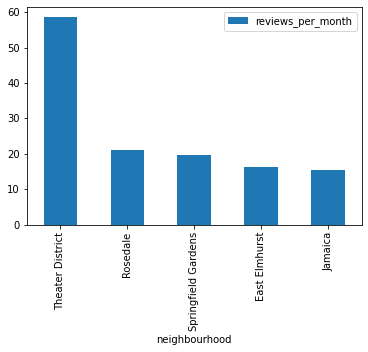

In [40]:
highest_reviews.plot.bar(x="neighbourhood")

**Top 5 Neighbourhoods having highest number of reviews**

In [41]:
highest_number_of_reviews = df.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(5)
highest_number_of_reviews

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352
1,Williamsburg,85427
2,Harlem,75962
3,Bushwick,52514
4,Hell's Kitchen,50227


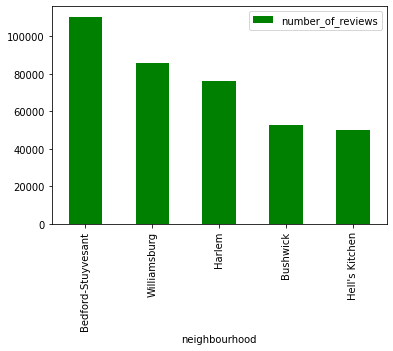

In [42]:
highest_number_of_reviews.plot.bar(x='neighbourhood', color='green')

#Question 5) What can we learn from predictions? (ex: locations, prices, reviews, etc)

**First we will try to visualize the location of each appartment using latitude and longitude values**

In [43]:
locations = list(zip(df.latitude, df.longitude)) # Storing the list of latitude and longitude
loc_map = folium.Map(location=[40.70,-73.80], zoom_start=10) # Note: This will only display map with the entered co-ordinates
# location=[latitude,longitude] 
FastMarkerCluster(data=locations).add_to(loc_map) # Note: This function will put up markers on the loc_map on the basis of given list of location co-ordinates
loc_map

### **Scatter plot according to neighbourhood group**

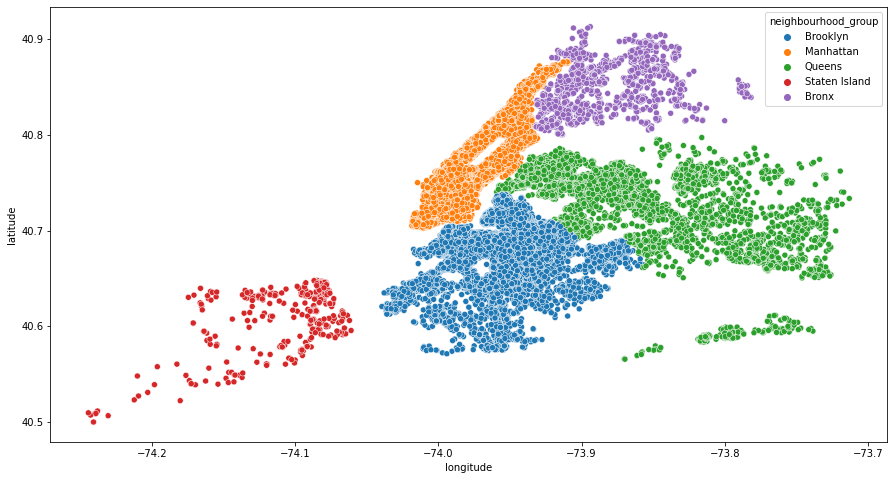

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['neighbourhood_group'])
plt.show()

### **Question 6) What is the distribution of the room type and its distribution over the location  ?**

### **Room type distrubution**

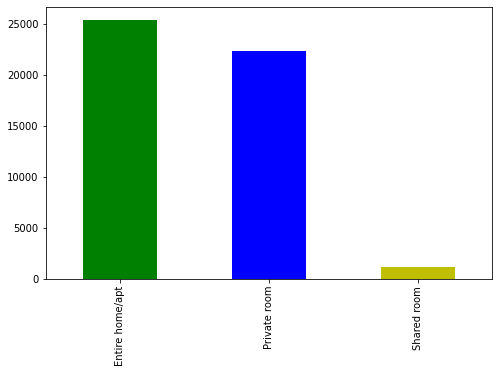

In [45]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['g','b','y'])

## **So  we can notice the following** 

#### **1)That maximum number of rooms are Entire home/Apartment and Private room, there are only few shared rooms .** 

#### **2)So mostly hosts prefer to give Entire home/Appartment or Private Rooms rather than shared rooms.**

**Lets see how room_type is distributed over all location ,is there any place where there is a dominance of any particular room_type over the others despite of thier overall ratios ?**

### **Scatter Plot**

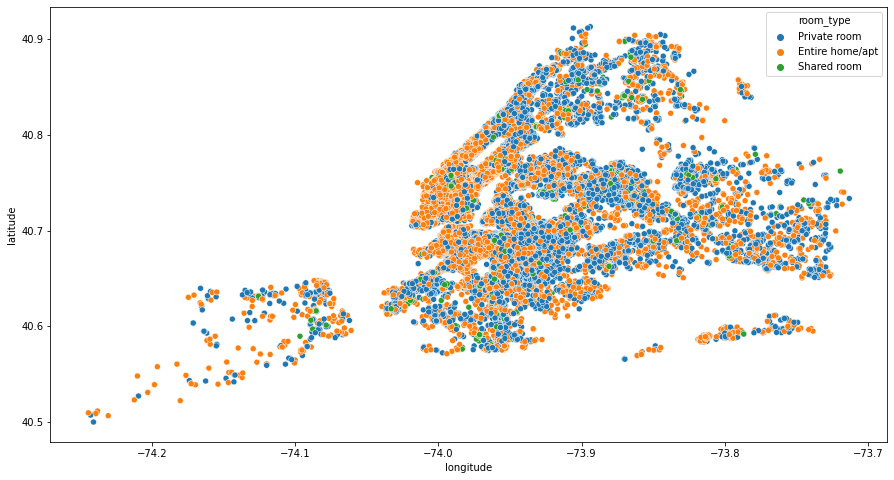

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['room_type'])
plt.show()


## **Question 7)    How is the room_type distributed over the neighbourhood_group, are the ratios of respective room_types more or less same over each neighbourhood_group ?**

---


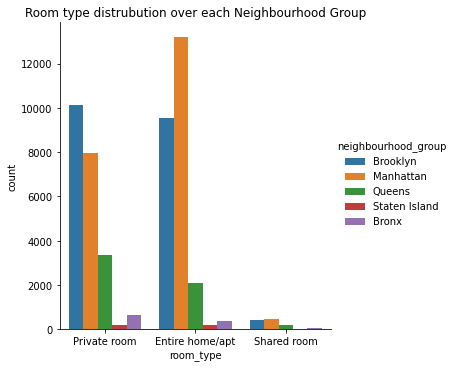

In [48]:
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df).set(title='Room type distrubution over each Neighbourhood Group')
plt.show()

This seems more or less same ratio in each neighbourhood_group.

## **Question 8) How the price column is distributed over room_type and are there any surprising items in price column ?**

This seems more or less same ratio in each neighbourhood_group.

In [50]:
# From the previous exploration we got to know that price column is having many values as 0 as it doesnt make any sense
# So we  will try to get rid of those instances for analysis of price column 
df_price=df[df['price']!=0].copy()

[Text(0.5, 1.0, 'Room_type distribution according to price')]

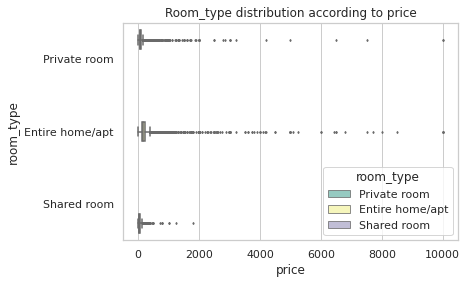

In [52]:
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price).set(title="Room_type distribution according to price")

**We can notice that there are many outliers for price column for each of the room_type  category, so lets just check why there is so high price or what else we can conclude for hosts having highest price for the rooms.**

In [54]:
# Lets check out the who is having highest price amongst all 
# And we will check its rating, minimum nights, availability_365  and last reviews in order to judge 

df[df['price']==df['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2016-02-13,0,10000,Queens
17692,Erin,0.16,2017-07-27,0,10000,Brooklyn
29238,Jelena,0.00,NaN,83,10000,Manhattan


### **Clearly if I would be working in Airbnb I would have suggested the following:** 

**1)    Kathrine and Erin have so high price and having no availability then what is the benefit of keeping too high price.**


**2) The last review is also 2-3 years back (as the data was collected in 2019)  which is also bad** 


**3) The reviews may be low as there may be very few people who is staying in Kathrine's, Erin's and Jelena's apartment so might have less reviews per month**


**4) I would have suggested to keep moderate(average) price so that more people would visit and stay in her appartment , it would also increase her reviews per month**


## **Question 9)   Which are the top 5 hosts that have  obtained highest no. of reviews ?**

---


In [55]:
host_highest_df=df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False).head()
host_highest_df

,host_id,host_name,number_of_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818


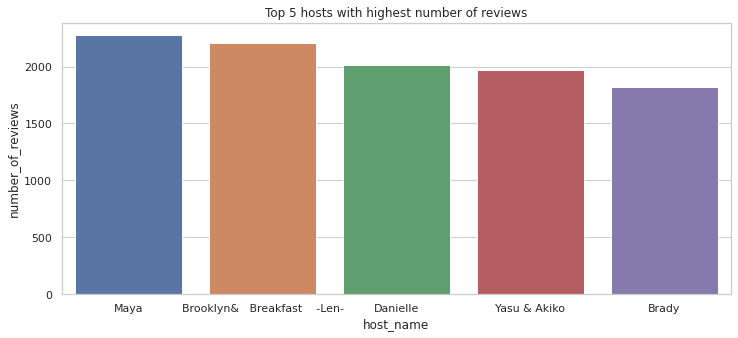

In [56]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'host_name',
            y = 'number_of_reviews',
            data = host_highest_df,ax=ax).set(title='Top 5 hosts with highest number of reviews')
 
# Show the plot
plt.show()